**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics

**Read data in pandas Dataframe**

In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Micro-Credit-Project\Data file.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


**Check datatypes**

In [4]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

**Check the shape of the dataset**

In [5]:
df.shape

(209593, 37)

**required datatype change**

In [6]:
df['pdate'].astype('datetime64')

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209593, dtype: datetime64[ns]

**Removing the data with no previous loan history**

In [7]:
index_names = df[ df['cnt_loans30'] == 0 ].index
df.drop(index_names, inplace = True)

In [8]:
df.shape

(206334, 37)

In [9]:
index_names1 = df[ df['cnt_loans90'] == 0 ].index
df.drop(index_names1,inplace = True)

In [10]:
df.shape

(206334, 37)

In [11]:
df1 = df.rename(columns = {'Unnamed: 0':'Customer_number'},inplace = False)

In [12]:
df1.head()

,Customer_number,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [13]:
df1.set_index('Customer_number',inplace = True)

In [14]:
df1.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
Customer_number,,,,,,,,,,,,,,,,,,,,,
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


**Checking skewness**

In [15]:
df1.skew(axis = 0)

label                   -2.243226
aon                     10.412316
daily_decr30             3.965795
daily_decr90             4.284159
rental30                 4.468993
rental90                 4.379261
last_rech_date_ma       14.802413
last_rech_date_da       14.763021
last_rech_amt_ma         3.838389
cnt_ma_rech30            3.276838
fr_ma_rech30            14.800651
sumamnt_ma_rech30        6.402651
medianamnt_ma_rech30     3.553197
medianmarechprebal30    14.778444
cnt_ma_rech90            3.427664
fr_ma_rech90             2.290585
sumamnt_ma_rech90        4.923172
medianamnt_ma_rech90     3.799376
medianmarechprebal90    45.512392
cnt_da_rech30           17.803363
fr_da_rech30            14.764186
cnt_da_rech90           27.137861
fr_da_rech90            28.775577
cnt_loans30              2.737129
amnt_loans30             2.997192
maxamnt_loans30         17.648609
medianamnt_loans30       4.510679
cnt_loans90             16.573289
amnt_loans90             3.145134
maxamnt_loans9

**Removing unnecessary columns**

In [16]:
df1 = df1.drop(['msisdn','pcircle'],axis = 1)

In [17]:
df1 = df1.drop(['pdate'],axis = 1)

In [18]:
x_data = df1.drop(['label'],axis =1)
y_data = df1['label']

In [19]:
x_data.round(2)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Customer_number,,,,,,,,,,,,,,,,,,,,,
1,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.00,29.00
2,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.00,0.00
3,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00
4,241.0,21.23,21.23,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.00,0.00
5,947.0,150.62,150.62,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.33,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,404.0,151.87,151.87,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.00,1.00
209590,1075.0,36.94,36.94,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.00,1.00
209591,1013.0,11843.11,11904.35,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.00,3.83


**Removing skewness**

In [20]:
from skew_autotransform import skew_autotransform

In [21]:
skew_autotransform(x_data, include = None, exclude = None, plot = False, threshold = 1, exp = False)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Customer_number,,,,,,,,,,,,,,,,,,,,,
1,5.007875,7.063366,6.857964,13.727007,11.583752,2.868565,1.986364,31.624181,0.793481,2.993640,...,0.589553,1.551326,0.136433,-1.666328e+06,0.600292,1.700162,0.089546,-2.098241e+07,3.113993,3.483684
2,5.641413,8.076737,7.802499,13.971596,11.751494,3.176564,1.986364,50.836330,0.009968,-4.726050,...,0.000000,1.551326,0.136433,-1.666328e+06,0.000000,1.700162,0.089546,-2.098241e+07,-5.143115,-4.399384
3,5.450142,6.484916,6.310847,13.777442,11.616678,2.890417,1.986364,31.624181,0.009968,-4.726050,...,0.000000,1.264623,0.136433,-1.666328e+06,0.000000,1.355357,0.089546,-2.098241e+07,-5.143115,-4.399384
4,4.931418,4.382941,4.305022,13.722439,11.578496,3.406182,1.986364,26.450913,-2.251392,-4.726050,...,0.589553,1.551326,0.136433,-1.666328e+06,0.600292,1.700162,0.089546,-2.098241e+07,-5.143115,-4.399384
5,5.833189,5.021444,4.918549,13.791938,11.626742,2.911526,1.986364,36.636475,2.819470,0.695411,...,1.264243,1.900247,0.136433,-1.666328e+06,1.323383,2.155489,0.089546,-2.098241e+07,0.834712,0.858870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,5.264127,5.025714,4.922639,13.791232,11.626252,2.845917,1.986364,44.791346,1.351915,0.695411,...,0.589553,1.551326,0.136433,-1.666328e+06,0.600292,1.700162,0.089546,-2.098241e+07,0.009948,0.009951
209590,5.918487,4.492695,4.410740,13.837131,11.658119,2.911526,1.986364,24.524225,1.800809,0.009950,...,0.853629,1.684589,0.136433,-1.666328e+06,0.877601,1.868410,0.089546,-2.098241e+07,0.009948,0.009951
209591,5.878522,8.059856,7.790136,14.110120,11.971470,2.890417,1.986364,31.624181,2.182549,2.056625,...,1.012133,1.900247,0.136433,-1.666328e+06,1.253765,2.226409,0.089546,-2.098241e+07,1.344317,1.364637


In [22]:
x_data.skew(axis = 0)

aon                     -0.460033
daily_decr30             0.034212
daily_decr90             0.042868
rental30                 0.548479
rental90                 0.275609
last_rech_date_ma       -3.587661
last_rech_date_da      -36.505734
last_rech_amt_ma        -0.365742
cnt_ma_rech30           -0.182420
fr_ma_rech30             0.002773
sumamnt_ma_rech30       -0.566669
medianamnt_ma_rech30    -0.555374
medianmarechprebal30    -3.469857
cnt_ma_rech90           -0.109122
fr_ma_rech90            -0.178749
sumamnt_ma_rech90       -0.415343
medianamnt_ma_rech90    -0.372963
medianmarechprebal90     0.274330
cnt_da_rech30            6.891589
fr_da_rech30            11.355026
cnt_da_rech90            5.992204
fr_da_rech90            15.356436
cnt_loans30              0.162150
amnt_loans30             0.134713
maxamnt_loans30          0.000000
medianamnt_loans30       3.414345
cnt_loans90              0.146729
amnt_loans90             0.118094
maxamnt_loans90          0.000000
medianamnt_loa

**Building differnt Models,evaluating them and saving the final model**

In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 30951
number of training samples: 175383


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
yhat = LR.predict(x_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8729927950631644

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average = 'weighted')

0.8178050013048129

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.17      0.01      0.01      3844
           1       0.88      1.00      0.93     27107

    accuracy                           0.87     30951
   macro avg       0.52      0.50      0.47     30951
weighted avg       0.79      0.87      0.82     30951



In [30]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM
#SVM.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
SVM.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_hat = SVM.predict(x_test)
y_hat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [33]:
f1_score(y_test,y_hat,average = 'weighted')

0.8178170318227073

In [34]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3844
           1       0.88      1.00      0.93     27107

    accuracy                           0.88     30951
   macro avg       0.44      0.50      0.47     30951
weighted avg       0.77      0.88      0.82     30951



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
new_x_data = np.nan_to_num(x_data.astype(np.float32))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(new_x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 30951
number of training samples: 175383


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred = clf.predict(x_test)

In [39]:
f1_score(y_test,y_pred,average = 'weighted')

0.8772165898775917

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.25      0.39      3844
           1       0.90      0.99      0.95     27107

    accuracy                           0.90     30951
   macro avg       0.89      0.62      0.67     30951
weighted avg       0.90      0.90      0.88     30951



In [41]:
from sklearn.ensemble import RandomForestClassifier
clfr=RandomForestClassifier(n_estimators=80)
clfr.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred1 = clfr.predict(x_test)


In [43]:
f1_score(y_test, y_pred1 , average = 'weighted')

0.9030071680193252

In [44]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.45      0.56      3844
           1       0.93      0.98      0.95     27107

    accuracy                           0.91     30951
   macro avg       0.84      0.71      0.76     30951
weighted avg       0.90      0.91      0.90     30951



In [45]:
import pickle

In [46]:
filename = 'finalized_model_Micro-credit-defaulter.sav'
pickle.dump(clfr, open(filename, 'wb'))


**visualization of feature importance in the classifier**

In [47]:
columns = x_data.columns

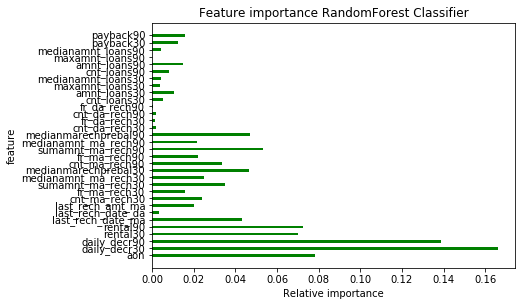

<Figure size 360x360 with 0 Axes>

In [48]:
y = clfr.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(columns, minor=False)
plt.title('Feature importance RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)